# Question 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
customer = pd.read_csv("Customer.csv")

In [ ]:
# On examine les données de customer
customer.head() # On voit directement qu'il y a '?' pour first_item_prize à la 3e ligne

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
0,41.0,6.0,28.0,Fem,False,4.0,China,113
1,34.0,4.0,15.5,Fem,True,2.0,China,36
2,38.0,5.0,?,Fem,False,7.0,China,111
3,20.0,1.0,44.0,Fem,False,2.0,China,71
4,39.0,10.0,10.0,Fem,True,4.0,China,80


In [ ]:
# Il faudrait modifier le type de 'revenue' en une variable numérique
#Il faudrait aussi modifier le type de 'first_item_prize' en une variable numérique
# 10000 observations dans le tableau
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  10000 non-null  object 
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           10000 non-null  object 
dtypes: bool(1), float64(3), object(4)
memory usage: 556.8+ KB


In [ ]:
customer.describe(include = "all")

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
count,10000.000000,10000.000000,10000,10000,10000,10000.000000,10000,10000
unique,NaN,NaN,11,2,2,NaN,50,469
top,NaN,NaN,44.0,Fem,False,NaN,China,68
freq,NaN,NaN,2083,6902,7200,NaN,200,83
mean,37.431400,5.995000,NaN,NaN,NaN,4.412000,NaN,NaN
std,9.490474,2.438559,NaN,NaN,NaN,2.418231,NaN,NaN
min,18.000000,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,31.000000,5.000000,NaN,NaN,NaN,3.000000,NaN,NaN
50%,37.000000,6.000000,NaN,NaN,NaN,4.000000,NaN,NaN
75%,43.000000,7.000000,NaN,NaN,NaN,6.000000,NaN,NaN


In [ ]:
# statistiques pour les variables de type object
customer.describe(include = object)
# Il n'y a que 11 valeurs différentes pour la variable 'first_item_prize', anomalie possible

,first_item_prize,gender,country,revenue
count,10000,10000,10000,10000
unique,11,2,50,469
top,44.0,Fem,China,68
freq,2083,6902,200,83


In [ ]:
# statistiques des variables numériques
customer.describe()

,age,pages,News_click
count,10000.000000,10000.000000,10000.000000
mean,37.431400,5.995000,4.412000
std,9.490474,2.438559,2.418231
min,18.000000,1.000000,0.000000
25%,31.000000,5.000000,3.000000
50%,37.000000,6.000000,4.000000
75%,43.000000,7.000000,6.000000
max,79.000000,14.000000,10.000000


In [ ]:
# variables de type boolean
customer.describe(include = bool)

,ReBuy
count,10000
unique,2
top,False
freq,7200


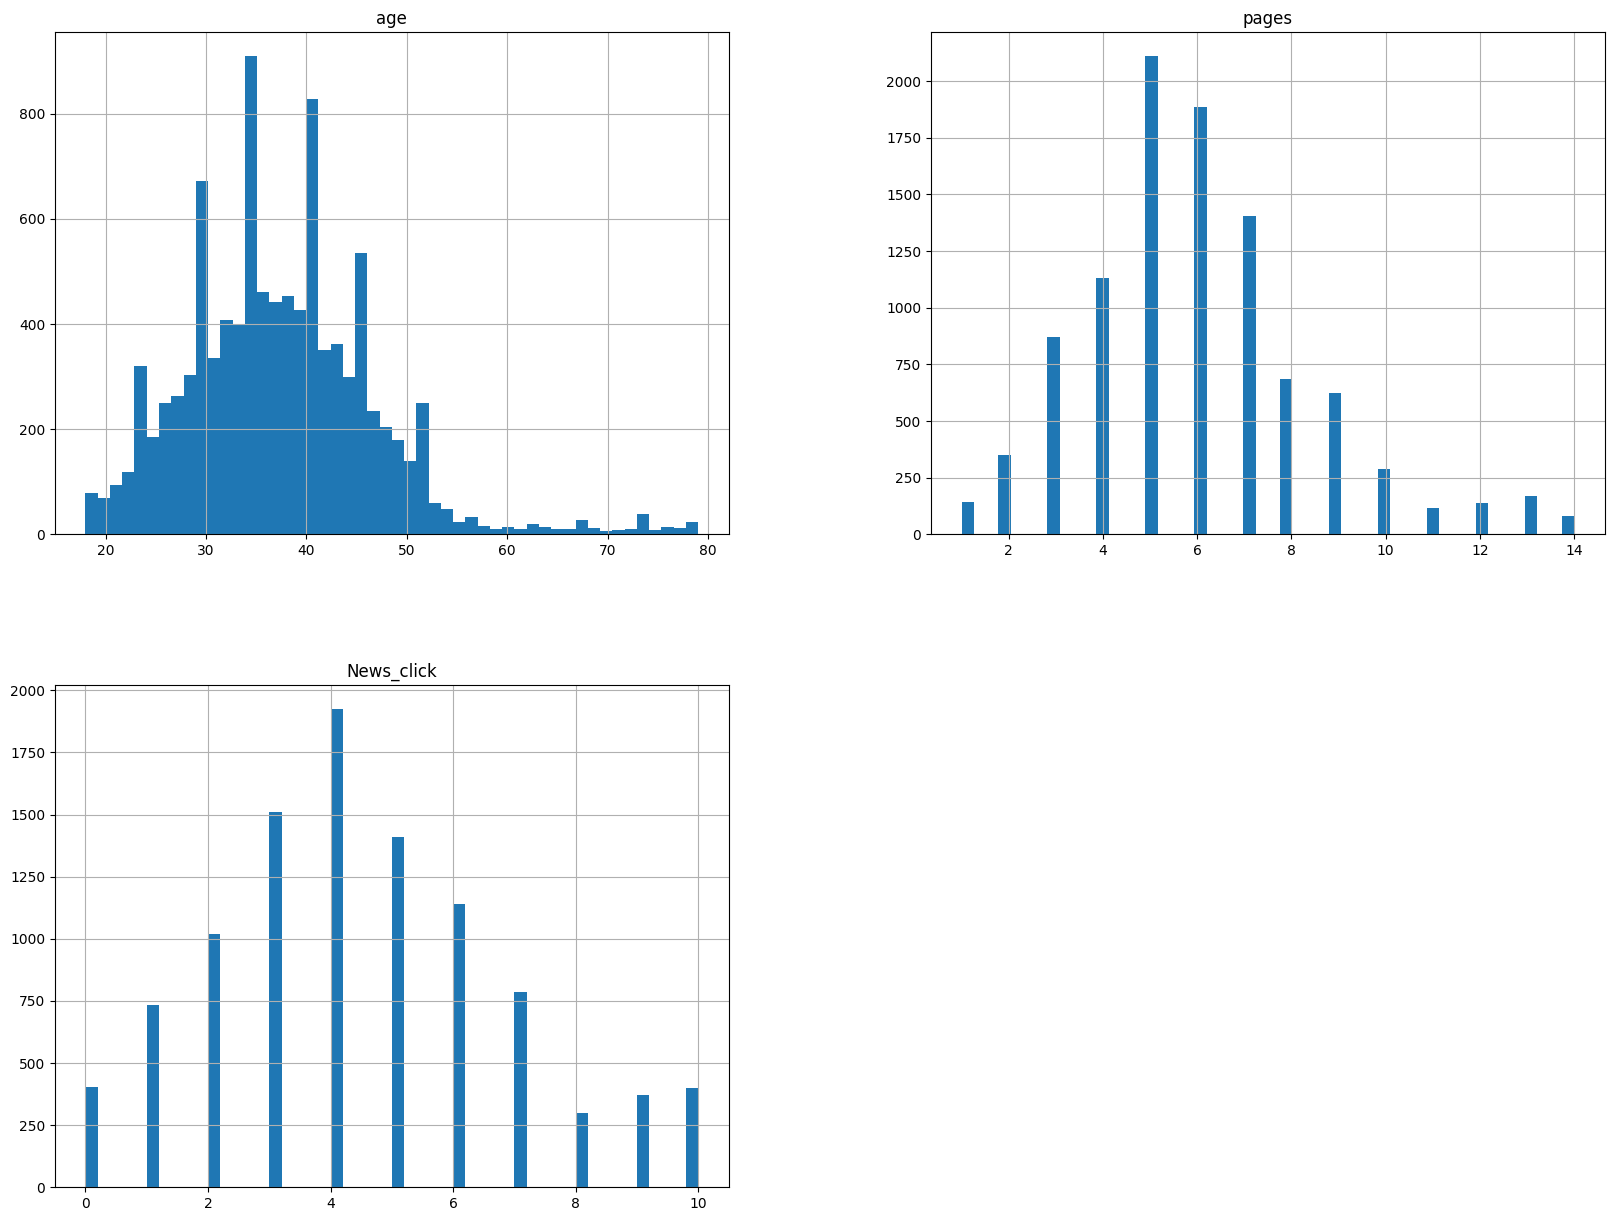

In [ ]:
# visualisation des valeurs numériques avec des histogrammes
%matplotlib inline
import matplotlib.pyplot as plt
customer.hist(bins = 50, figsize = (20,15))
plt.show()

In [ ]:
# *NOTE: Ici on traite les valeurs manquantes qui incluent notaùent 'unknown' ET '?' dans la meme fonction

In [ ]:
# Fonction qui permet de lire les valeurs manquantes pour les différents fichiers

# On initialise la liste qui contient plusieurs caractères qui représentent des données manquantes
missing_values = ["NaN", "N/a", "na", "unknown", '?','-', np.nan]
def detect_missing_values_files(file, missing_values):
# Lecture du fichier CSV en utilisant les valeurs manquantes issues de "missing_values"
    df = pd.read_csv(file, na_values = missing_values)
# On compte les valeurs manquantes de chaque variable
    missing_value_counts = df.isnull().sum()
    return df, missing_value_counts


In [ ]:
# Affichage du nombre de valeurs manquantes pour les variables du fichier Customer.csv
df, missing_value_counts = detect_missing_values_files("Customer.csv", missing_values)
print(missing_value_counts)
# 4 missing values pour "revenue"
# 3 missing values pour"first_item_prize"

age                 0
pages               0
first_item_prize    3
gender              0
ReBuy               0
News_click          0
country             0
revenue             4
dtype: int64


In [ ]:
# La fonction renvoie la localisation des valeurs manquantes dans revenue
# Fonction qui fait appel à la fonction précédente pour la lecture du fichier
def func_loc_missing_values(file, missing_values):
    df, missing_value_counts = detect_missing_values_files(file, missing_values)
    missing_values_location = df[df.isnull().any(axis=1)].index
    return missing_values_location

missing_values_location = func_loc_missing_values("Customer.csv", missing_values)
print(missing_values_location)

Int64Index([2, 5, 112, 1233, 2003, 6678, 9834], dtype='int64')


In [ ]:
# ON REMPLACE MAINTENANT LES VALEURS MANQUANTES DU DATASET PAR NaN POUR POUVOIR LES TRAITER PLUS TARD

In [ ]:
# La fonction missing_values_ va remplacer les valeurs manquantes par NaN pour qu'on puisse les manipuler par la suite
def missing_values_NaN(customer_clean, missing_values):
    customer_clean =pd.DataFrame(customer_clean)
    customer_clean.replace(to_replace=missing_values, value=np.nan, inplace=True)
    return df

# Initialisation de la liste qui des données manquantes
missing_values = ["NaN", "N/a", "na", "unknown", '?', np.nan]

# copie du fichier
customer_clean = customer.copy()

# Appelle de fonction pour remplacer les valeurs manquantes par NaN
customer_clean = missing_values_NaN(df, missing_values)

# Transformateur pour la fonction missing_values_NaN
missing_values_transformer = FunctionTransformer(missing_values_NaN, validate=False, kw_args={'missing_values': missing_values})


In [ ]:
# Les missing values ont bien étés remplacés par NaN
liste_indexes = [2,5,112,1233,2003,6678,9834]
customer_clean.loc[liste_indexes]

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue
2,38.0,5.0,NaN,Fem,False,7.0,China,111.0
5,39.0,8.0,44.0,Fem,False,5.0,China,NaN
112,38.0,5.0,NaN,Fem,False,6.0,China,95.0
1233,18.0,11.0,10.0,Fem,False,8.0,Nigeria,NaN
2003,40.0,4.0,42.0,Masc,False,5.0,Mexico,NaN
6678,48.0,6.0,NaN,Fem,False,2.0,Sudan,101.0
9834,50.0,7.0,22.0,Fem,False,7.0,Taiwan,NaN


In [ ]:
# On change le type des variables
def func_change_dtype(df, colonnes, dtype= float):
    df[colonnes] = df[colonnes].apply(pd.to_numeric, errors = 'coerce')
    df[colonnes] = df[colonnes].astype(dtype)
    return df
colonnes = ['first_item_prize', 'revenue']
customer_clean = func_change_dtype(customer_clean, colonnes)

In [ ]:
# Les variables ont bien étés étés converties en numérique
customer_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               10000 non-null  float64
 1   pages             10000 non-null  float64
 2   first_item_prize  9997 non-null   float64
 3   gender            10000 non-null  object 
 4   ReBuy             10000 non-null  bool   
 5   News_click        10000 non-null  float64
 6   country           10000 non-null  object 
 7   revenue           9996 non-null   float64
dtypes: bool(1), float64(5), object(2)
memory usage: 556.8+ KB


In [ ]:
# On sépare les variables numériques des autres variables

In [ ]:
#extraire que les varaibles_numériques
#faire un drop des caractéristiques de type objet et la variable cible
v_cat = ['gender','country','ReBuy']
customer_num = customer_clean.drop(columns=v_cat, axis=1)


In [ ]:
#remplacement des valeurs manquantes pour les variables de type numérique.
#importation de l'utilitaire d'imputation
from sklearn.impute import SimpleImputer
#de chaque caractéristique. la stratégie de remplacement est la mediane
imputer = SimpleImputer(strategy='median')
#mantenant on peut appliquer l'instance SimpleImputer
#au jeu de données -TBA- d'entrainement  en utilisant la méthode fit():
imputer.fit(customer_num)
#transformer le jeu d’entrainement en
# remplaçant les valeurs manquantes par les médianes apprises
X_num= imputer.transform(customer_num)

df_customer_num=pd.DataFrame(X_num, columns=customer_num.columns)

In [ ]:
df_customer_num
#faire une copie du data numérique
customer_num_copy = df_customer_num.copy()

In [ ]:
print(df_customer_num)

       age  pages  first_item_prize  News_click  revenue
0     41.0    6.0              28.0         4.0    113.0
1     34.0    4.0              15.5         2.0     36.0
2     38.0    5.0              42.0         7.0    111.0
3     20.0    1.0              44.0         2.0     71.0
4     39.0   10.0              10.0         4.0     80.0
...    ...    ...               ...         ...      ...
9995  49.0    8.0              44.0         4.0    254.0
9996  32.0    5.0              42.0         1.0     82.0
9997  47.0    8.0              15.5         3.0    117.0
9998  42.0    7.0              42.0         2.0     70.0
9999  41.0    5.0              42.0         2.0    107.0

[10000 rows x 5 columns]


In [ ]:
# Gestion des variables quantitatives
# Utilisation du transformateur OneHotEncoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
v_cat = customer_clean[['gender','country','ReBuy', 'revenue']]
v_cat_1hot = encoder.fit_transform(v_cat)


In [ ]:
v_cat_1hot

<10000x523 sparse matrix of type '<class 'numpy.float64'>'
	with 40000 stored elements in Compressed Sparse Row format>

In [ ]:
#verification
customer_num.median().values

array([ 37.,   6.,  42.,   4., 100.])

In [ ]:
X = df_customer_num

In [ ]:
v_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gender   10000 non-null  object 
 1   country  10000 non-null  object 
 2   ReBuy    10000 non-null  bool   
 3   revenue  9996 non-null   float64
dtypes: bool(1), float64(1), object(2)
memory usage: 244.3+ KB


In [ ]:
def clamp_replace_bruit(dataset, quartile_inf, quartile_sup):
    #Calcul du 1er quartile
    Q1 = dataset.quantile(quartile_inf)
    #calucl du 3e quartile
    Q3 = dataset.quantile(quartile_sup)
    # Calcul de l'interval interquartile
    iqr = Q3 - Q1
    #limite supérieure
    limite_sup = Q3 + 1.5 * iqr
    #limite inférieure
    limite_inf = Q1 - 1.5 * iqr
    # On remplace les valeurs jugées outliers, c'est à dire qui ne sont pas compris en la borne inf et la borne sup
    # On remplace les valeurs grace à clip soit par la borne inférieure, soit par la borne supérieure
    dataset = dataset.clip(lower = limite_inf, upper = limite_sup, axis = 1)
    return dataset

dataset = df_customer_num
dataset_clamp = clamp_replace_bruit(dataset, 0.25, 0.75)
print(dataset_clamp)

       age  pages  first_item_prize  News_click  revenue
0     41.0    6.0              28.0         4.0    113.0
1     34.0    4.0              15.5         2.0     36.0
2     38.0    5.0              42.0         7.0    111.0
3     20.0    2.0              44.0         2.0     71.0
4     39.0   10.0              10.0         4.0     80.0
...    ...    ...               ...         ...      ...
9995  49.0    8.0              44.0         4.0    254.0
9996  32.0    5.0              42.0         1.0     82.0
9997  47.0    8.0              15.5         3.0    117.0
9998  42.0    7.0              42.0         2.0     70.0
9999  41.0    5.0              42.0         2.0    107.0

[10000 rows x 5 columns]


In [ ]:
#matrice de corrélation
corr_matrix = X.corr()

In [ ]:
corr_matrix
#On observe que les variables sont très faiblement corrélées entre elles
# Il n'y a donc PAS besoin de plus étudier les variables 2 à 2 car on le fait uniquement si la corrélation est forte entre
# 2 variables ce qui risquerait de biaiser le modèle ce qui n'est pas le cas ici

,age,pages,first_item_prize,News_click,revenue
age,1.000000,0.009229,0.007616,-0.004952,0.011675
pages,0.009229,1.000000,-0.019276,-0.010929,-0.015878
first_item_prize,0.007616,-0.019276,1.000000,0.005884,0.367067
News_click,-0.004952,-0.010929,0.005884,1.000000,0.377864
revenue,0.011675,-0.015878,0.367067,0.377864,1.000000


In [ ]:
# Enrichissement des données

In [ ]:
dataset_cleaned = dataset_clamp.copy()
dataset_cleaned['gender'] = v_cat['gender']
dataset_cleaned['country'] = v_cat['country']
dataset_cleaned['ReBuy'] = v_cat['ReBuy']

In [ ]:
# On positionne la variable cible dans la dernière colonne
var_cible = 'revenue'
cols = list(dataset_cleaned.columns)
cols.remove(var_cible)
cols.append(var_cible)
dataset_cleaned = dataset_cleaned[cols]

In [ ]:
dataset_cleaned.isnull().sum()

age                 0
pages               0
first_item_prize    0
News_click          0
gender              0
country             0
ReBuy               0
revenue             0
dtype: int64

In [ ]:
df = dataset_cleaned.copy()

###### Numérisation des colonnes et fonction pour encoder 'revenue'

In [ ]:
# Fonction qui transforme la variable cible 'revenue' en format binaire
# Si observation de la variable 'revenue' < moyenne revenue = 0 sinon = 1
def revenue_bin(dataset):
    moy_rev = dataset["revenue"].mean()
    dataset["class_revenue"] = (dataset["revenue"] > moy_rev).astype(int)
    return dataset.drop("revenue", axis = 1)

In [ ]:
df = revenue_bin(dataset=df)

In [ ]:
df.head()

,age,pages,first_item_prize,News_click,gender,country,ReBuy,class_revenue
0,41.0,6.0,28.0,4.0,Fem,China,False,0
1,34.0,4.0,15.5,2.0,Fem,China,True,0
2,38.0,5.0,42.0,7.0,Fem,China,False,0
3,20.0,2.0,44.0,2.0,Fem,China,False,0
4,39.0,10.0,10.0,4.0,Fem,China,True,0


In [ ]:
df.head()

,age,pages,first_item_prize,News_click,gender,country,ReBuy,class_revenue
0,41.0,6.0,28.0,4.0,Fem,China,False,0
1,34.0,4.0,15.5,2.0,Fem,China,True,0
2,38.0,5.0,42.0,7.0,Fem,China,False,0
3,20.0,2.0,44.0,2.0,Fem,China,False,0
4,39.0,10.0,10.0,4.0,Fem,China,True,0


#### Standardisation des données

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# variables à standardiser
cols_to_scale = ['age', 'pages', 'first_item_prize', 'News_click']

scaler = StandardScaler()
le = LabelEncoder()

# On encode les variables 'gender', 'country' et 'ReBuy'
df['gender_encoded'] = le.fit_transform(df['gender'])
df['country_encoded'] = le.fit_transform(df['country'])
df['ReBuy_encoded'] = le.fit_transform(df['ReBuy'])

# On fit
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# On supprime les colonnes orignales
df =df.drop(['gender', 'country', 'ReBuy'], axis = 1)
df.head()

,age,pages,first_item_prize,News_click,class_revenue,gender_encoded,country_encoded,ReBuy_encoded
0,0.429888,0.053422,-0.452257,-0.170381,0,0,8,0
1,-0.365991,-0.892098,-1.056440,-0.997473,0,0,8,1
2,0.088797,-0.419338,0.224427,1.070257,0,0,8,0
3,-1.957748,-1.837618,0.321096,-0.997473,0,0,8,0
4,0.202494,1.944462,-1.322280,-0.170381,0,0,8,1


## Question 2: Réduction de dimension (ACP)

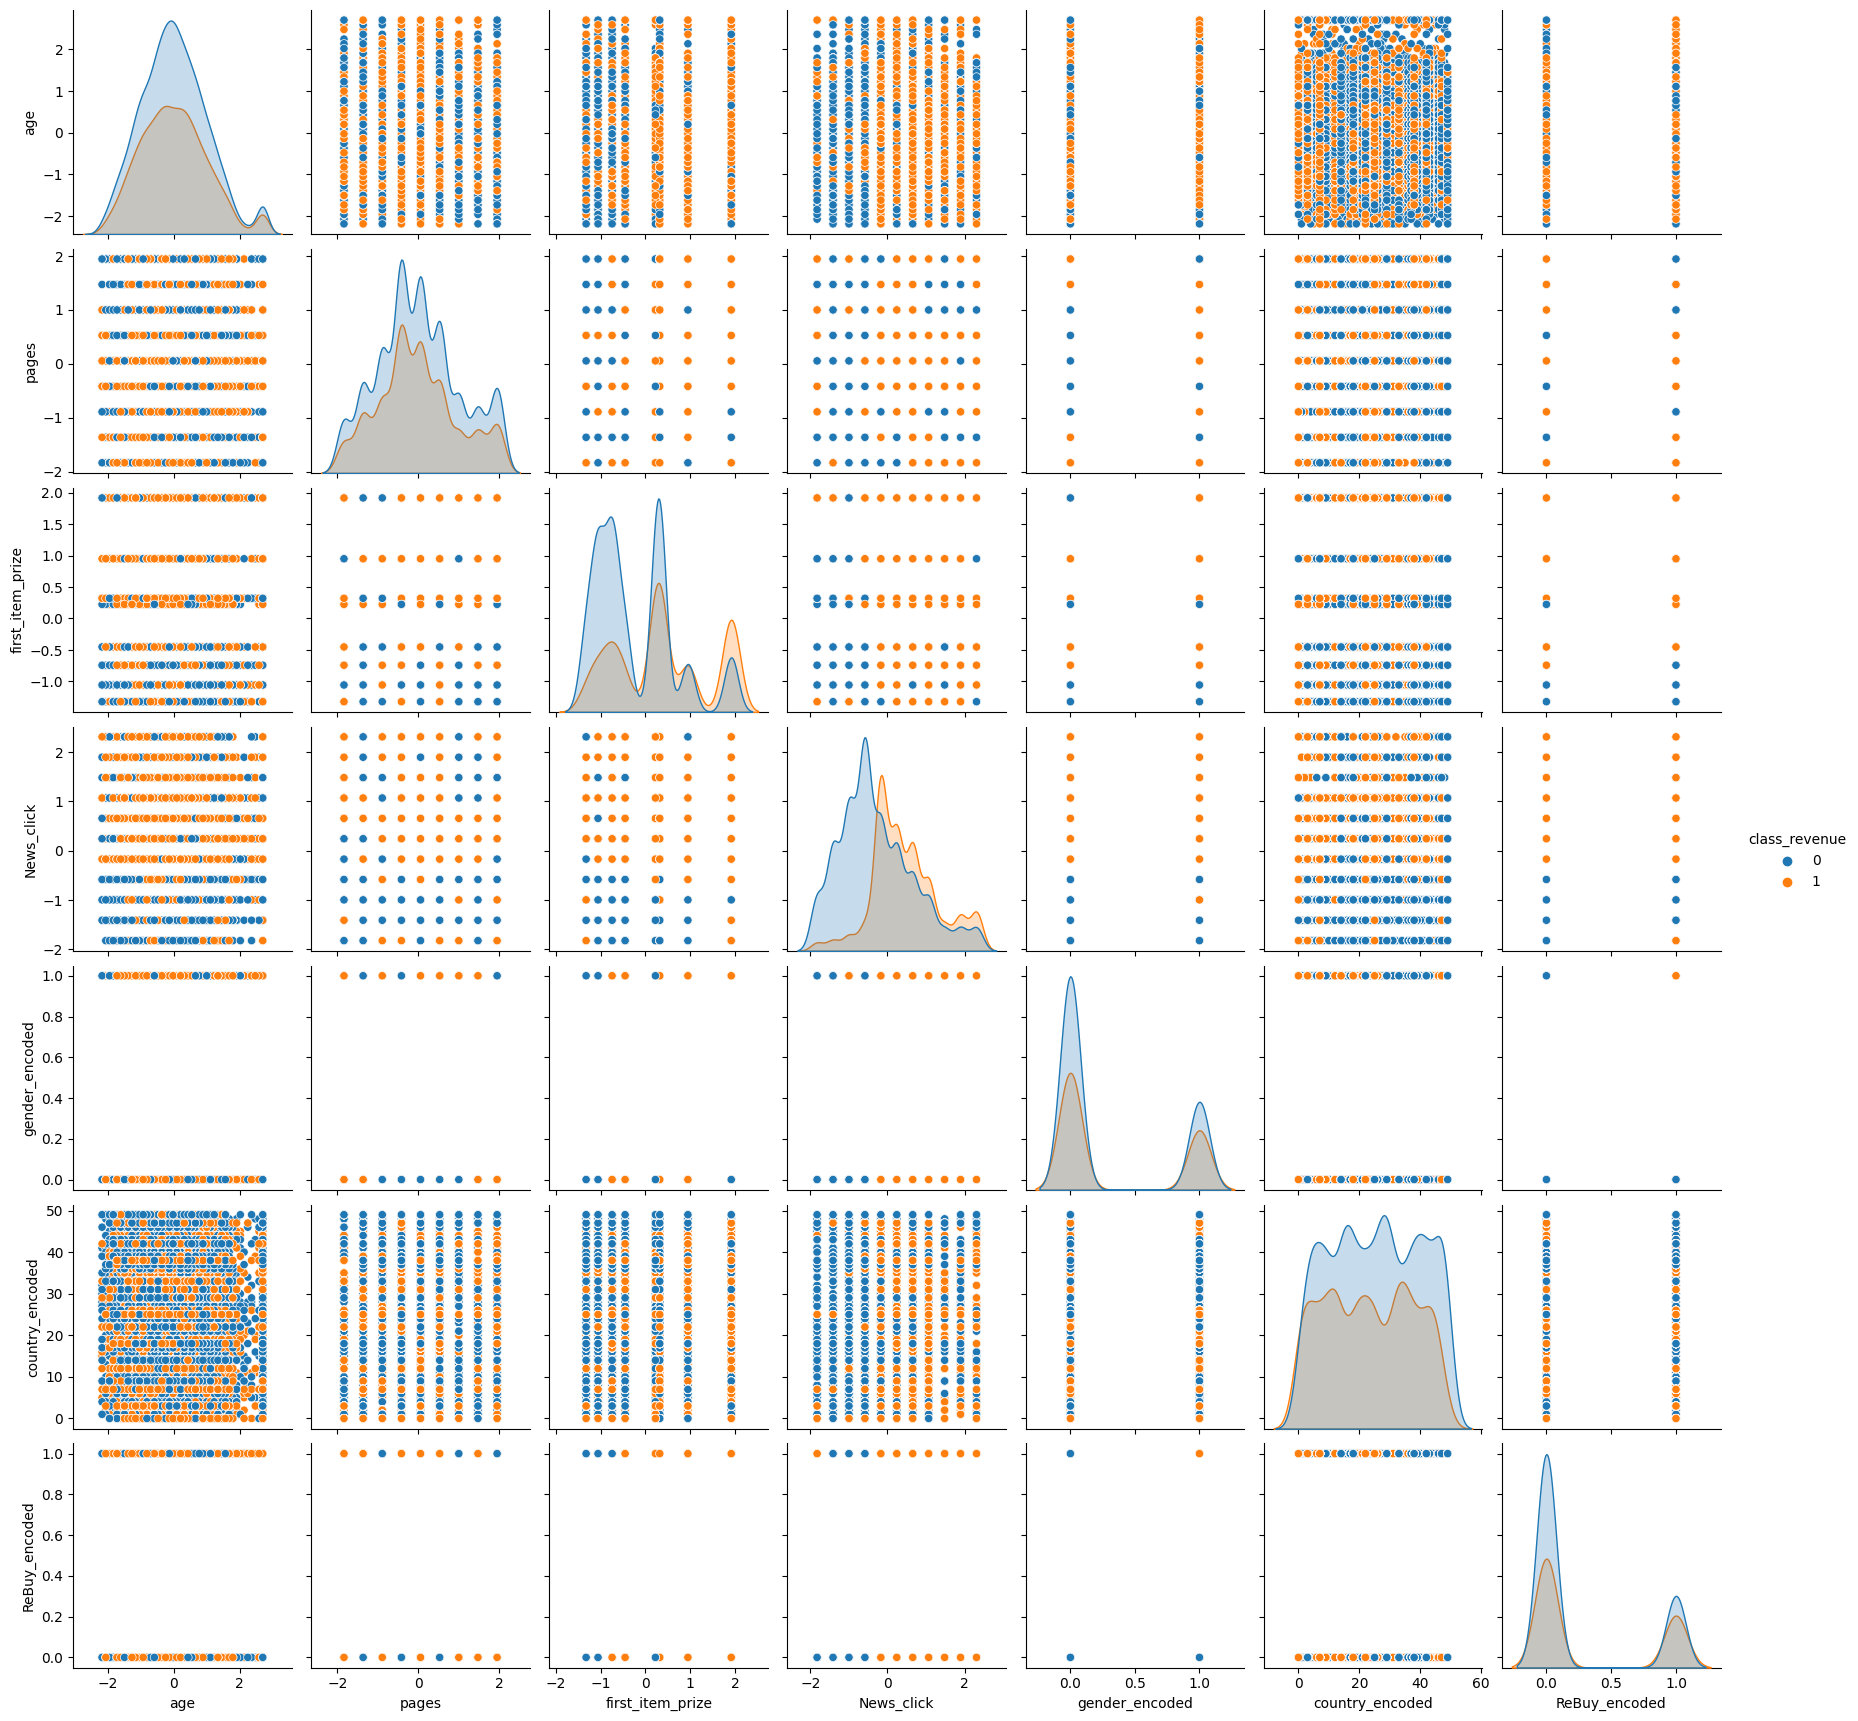

In [ ]:
# On visualise les données avant la réduction de dimention
import seaborn as sns
sns.pairplot(df, hue = "class_revenue", vars = ['age', 'pages', 'first_item_prize', 'News_click', 'gender_encoded', 'country_encoded', 'ReBuy_encoded'])

In [ ]:
# On selectionne les données sans la variable cible
X = df.drop(["class_revenue"], axis=1)
# On selection la variable cible
y = df["class_revenue"]

In [ ]:
from sklearn.decomposition import PCA
# On réduit à 2 composants
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

In [ ]:
pca.explained_variance_

array([208.2717381 ,   1.02989082])

In [ ]:
pca.explained_variance_ratio_

array([0.97924198, 0.00484229])

In [ ]:
pca.singular_values_

array([1443.09012515,  101.47846222])

In [ ]:
# On créer un DataFrame pour les composants principaux et pour la visualisation des données
PCAResult = pd.DataFrame(X_reduced, columns = [f"PCA-{i}" for i in range (1,3)])
PCAResult["class_revenue"] = y

### Les données après la réduction de dimension

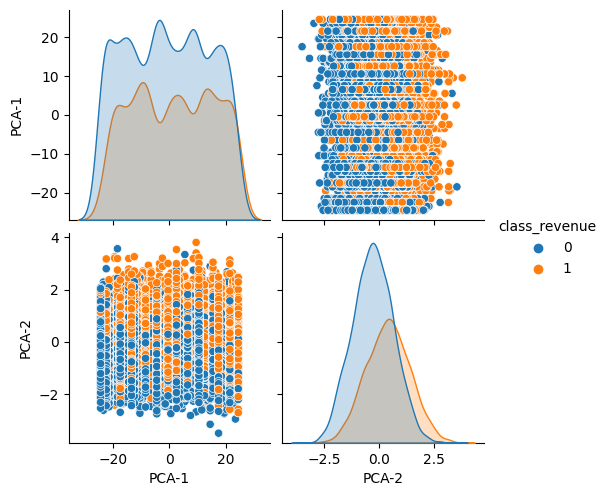

In [ ]:
import seaborn as sns
sns.pairplot(PCAResult, hue = 'class_revenue', vars = ['PCA-1', 'PCA-2'])

In [ ]:
PCAResult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PCA-1          10000 non-null  float64
 1   PCA-2          10000 non-null  float64
 2   class_revenue  10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [ ]:
PCAResult.head()

,PCA-1,PCA-2,class_revenue
0,16.499189,-0.490345,0
1,16.498922,-0.374277,0
2,16.499868,0.822432,0
3,16.500098,1.433069,0
4,16.497625,-2.150895,0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

def preparationDesDonnees():
  customer = pd.read_csv("Customer.csv")
  # On examine les données de customer
  customer.head() # On voit directement qu'il y a '?' pour first_item_prize à la 3e ligne
  # Il faudrait modifier le type de 'revenue' en une variable numérique
  #Il faudrait aussi modifier le type de 'first_item_prize' en une variable numérique
  # 10000 observations dans le tableau
  customer.info()
  customer.describe(include = "all")
  # statistiques pour les variables de type object
  customer.describe(include = object)
  # Il n'y a que 11 valeurs différentes pour la variable 'first_item_prize', anomalie possible
  # statistiques des variables numériques
  customer.describe()
  # variables de type boolean
  customer.describe(include = bool)

  # visualisation des valeurs numériques avec des histogrammes
  customer.hist(bins = 50, figsize = (20,15))
  plt.show()
  # NOTE: Ici on traite les valeurs manquantes qui incluent notaùent 'unknown' ET '?' dans la meme fonction
  # Fonction qui permet de lire les valeurs manquantes pour les différents fichiers

  # On initialise la liste qui contient plusieurs caractères qui représentent des données manquantes
  missing_values = ["NaN", "N/a", "na", "unknown", '?','-', np.nan]
  def detect_missing_values_files(file, missing_values):
     # Lecture du fichier CSV en utilisant les valeurs manquantes issues de "missing_values"
    df = pd.read_csv(file, na_values = missing_values)
    # On compte les valeurs manquantes de chaque variable
    missing_value_counts = df.isnull().sum()
    return df, missing_value_counts

# Affichage du nombre de valeurs manquantes pour les variables du fichier Customer.csv
  df, missing_value_counts = detect_missing_values_files("Customer.csv", missing_values)
  print(missing_value_counts)
# 4 missing values pour "revenue"
# 3 missing values pour"first_item_prize"
# La fonction renvoie la localisation des valeurs manquantes dans revenue

# Fonction qui fait appel à la fonction précédente pour la lecture du fichier
  def func_loc_missing_values(file, missing_values):
    df, missing_value_counts = detect_missing_values_files(file, missing_values)
    missing_values_location = df[df.isnull().any(axis=1)].index
    return missing_values_location
  missing_values_location = func_loc_missing_values("Customer.csv", missing_values)
  print(missing_values_location)

 # ON REMPLACE MAINTENANT LES VALEURS MANQUANTES DU DATASET PAR NaN POUR POUVOIR LES TRAITER PLUS TARD
 # La fonction missing_values_ va remplacer les valeurs manquantes par NaN pour qu'on puisse les manipuler par la suite
  def missing_values_NaN(customer_clean, missing_values):
    customer_clean =pd.DataFrame(customer_clean)
    customer_clean.replace(to_replace=missing_values, value=np.nan, inplace=True)
    return df

# Initialisation de la liste qui des données manquantes
  missing_values = ["NaN", "N/a", "na", "unknown", '?', np.nan]

# copie du fichier
  customer_clean = customer.copy()

# Appelle de fonction pour remplacer les valeurs manquantes par NaN
  customer_clean = missing_values_NaN(df, missing_values)

# Transformateur pour la fonction missing_values_NaN
  missing_values_transformer = FunctionTransformer(missing_values_NaN, validate=False, kw_args={'missing_values': missing_values})
# Les missing values ont bien étés remplacés par NaN
  liste_indexes = [2,5,112,1233,2003,6678,9834]
  customer_clean.loc[liste_indexes]

 # On change le type des variables
  def func_change_dtype(df, colonnes, dtype= float):
    df[colonnes] = df[colonnes].apply(pd.to_numeric, errors = 'coerce')
    df[colonnes] = df[colonnes].astype(dtype)
    return df
  colonnes = ['first_item_prize', 'revenue']
  customer_clean = func_change_dtype(customer_clean, colonnes)
  # Les variables ont bien étés étés converties en numérique
  customer_clean.info()

  # On sépare les variables numériques des autres variables
  #extraire que les varaibles_numériques
#faire un drop des caractéristiques de type objet et la variable cible
  v_cat = ['gender','country','ReBuy']
  customer_num = customer_clean.drop(columns=v_cat, axis=1)

#remplacement des valeurs manquantes pour les variables de type numérique.
#de chaque caractéristique. la stratégie de remplacement est la mediane
  imputer = SimpleImputer(strategy='median')
#mantenant on peut appliquer l'instance SimpleImputer
#au jeu de données -TBA- d'entrainement  en utilisant la méthode fit():
  imputer.fit(customer_num)
#transformer le jeu d’entrainement en
# remplaçant les valeurs manquantes par les médianes apprises
  X_num= imputer.transform(customer_num)
  df_customer_num=pd.DataFrame(X_num, columns=customer_num.columns)

  df_customer_num
#faire une copie du data numérique
  customer_num_copy = df_customer_num.copy()
  print(df_customer_num)

  # Gestion des variables quantitatives
  # Utilisation du transformateur OneHotEncoder
  encoder = OneHotEncoder()
  v_cat = customer_clean[['gender','country','ReBuy', 'revenue']]
  v_cat_1hot = encoder.fit_transform(v_cat)
  v_cat_1hot
  #verification
  customer_num.median().values
  X = df_customer_num
  v_cat.info()

  def clamp_replace_bruit(dataset, quartile_inf, quartile_sup):
    #Calcul du 1er quartile
    Q1 = dataset.quantile(quartile_inf)
    #calucl du 3e quartile
    Q3 = dataset.quantile(quartile_sup)
    # Calcul de l'interval interquartile
    iqr = Q3 - Q1
    #limite supérieure
    limite_sup = Q3 + 1.5 * iqr
    #limite inférieure
    limite_inf = Q1 - 1.5 * iqr
    # On remplace les valeurs jugées outliers, c'est à dire qui ne sont pas compris en la borne inf et la borne sup
    # On remplace les valeurs grace à clip soit par la borne inférieure, soit par la borne supérieure
    dataset = dataset.clip(lower = limite_inf, upper = limite_sup, axis = 1)
    return dataset

  dataset = df_customer_num
  dataset_clamp = clamp_replace_bruit(dataset, 0.25, 0.75)
  print(dataset_clamp)

  #matrice de corrélation
  corr_matrix = X.corr()
  corr_matrix
  #On observe que les variables sont très faiblement corrélées entre elles
  # Il n'y a donc PAS besoin de plus étudier les variables 2 à 2 car on le fait uniquement si la corrélation est forte entre
  # 2 variables ce qui risquerait de biaiser le modèle ce qui n'est pas le cas ici

  # Enrichissement des données
  dataset_cleaned = dataset_clamp.copy()
  dataset_cleaned['gender'] = v_cat['gender']
  dataset_cleaned['country'] = v_cat['country']
  dataset_cleaned['ReBuy'] = v_cat['ReBuy']

  # On positionne la variable cible dans la dernière colonne
  var_cible = 'revenue'
  cols = list(dataset_cleaned.columns)
  cols.remove(var_cible)
  cols.append(var_cible)
  dataset_cleaned = dataset_cleaned[cols]
  # On reverifie que le dataset ne contient plus de valeurs manquantes
  dataset_cleaned.isnull().sum()
  df = dataset_cleaned.copy()

  # Numérisation des colonnes et fonction pour encoder 'revenue'
  # Fonction qui transforme la variable cible 'revenue' en format binaire
  # Si observation de la variable 'revenue' < moyenne revenue = 0 sinon = 1
  def revenue_bin(dataset):
    moy_rev = dataset["revenue"].mean()
    dataset["class_revenue"] = (dataset["revenue"] > moy_rev).astype(int)
    return dataset.drop("revenue", axis = 1)
  df = revenue_bin(dataset=df)
  df.head()


  # Standardisation des données

# variables à standardiser
  cols_to_scale = ['age', 'pages', 'first_item_prize', 'News_click']
  scaler = StandardScaler()
  le = LabelEncoder()

# On encode les variables 'gender', 'country' et 'ReBuy'
  df['gender_encoded'] = le.fit_transform(df['gender'])
  df['country_encoded'] = le.fit_transform(df['country'])
  df['ReBuy_encoded'] = le.fit_transform(df['ReBuy'])

# On fit
  df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# On supprime les colonnes orignales
  df =df.drop(['gender', 'country', 'ReBuy'], axis = 1)
  df.head()
  return dataset_cleaned
